In [1]:
from random import *
from itertools import combinations


def minConflicts(constraints, maxIter, numWizards):
    currentState = [[False for x in range(numWizards)] for y in range(numWizards)] #matrix of current booleans
    for r in range(numWizards):
        for c in range(r):
            currentState[r][c]=True #possibly might change this to linearized index
    prevConflicts = 0
    for i in range(maxIter):
        conflicts = numberConflicting(currentState, constraints)
        if conflicts == 0:
            print("SATISFIED", i)
            return currentState, i
        maxResolve = 0
        maxRow = -1
        maxCol = -1
        if conflicts - prevConflicts == 0:
#             print(conflicts)
#             print("kick")
            currentState = kick(currentState)
        else:
            for r in range(numWizards):
                for c in range(r):
                    currentState[r][c]= not currentState[r][c]
                    currentState[c][r]= not currentState[c][r]
                    newConflicts = numberConflicting(currentState, constraints)
                    if conflicts - newConflicts > maxResolve:
                        maxResolve = conflicts - newConflicts
                        maxRow = r
                        maxCol = c
                    currentState[r][c]= not currentState[r][c]
                    currentState[c][r]= not currentState[c][r]
            
            currentState[maxRow][maxCol] = not currentState[maxRow][maxCol]
            currentState[maxCol][maxRow] = not currentState[maxCol][maxRow]
        prevConflicts = conflicts
    print("GIVEN UP after", maxIter, "iterations")
    return currentState, maxIter

def kick(currentState):
    num_wizards = len(currentState)
    for i in range(num_wizards//7):
        r = int(random.random()*num_wizards)
        c = int(random.random()*num_wizards)
        currentState[r][c] = not currentState[r][c]
        currentState[c][r] = not currentState[c][r]
    return currentState

def numberConflicting(currentState, constraints):
#     conflicts = 0
#     for c in constraints:
#         if isConflicting(currentState, c):
#             conflicts += 1
#     return conflicts
    return sum(isConflicting(currentState, c) for c in constraints)
        
def isConflicting(currentState, c):
    return not ((currentState[c[2]][c[0]] and currentState[c[2]][c[1]]) 
            or (currentState[c[0]][c[2]] and currentState[c[1]][c[2]]) )

def prettyPrint(a):
    for r in a:
        print(r)
    

import matplotlib.pyplot as plt

import random
from itertools import combinations

def make_ordering(n):
    """Generates a random ordering of n wizards, returned as a
    shuffled list containing the elements 0, 1, ..., n-1"""
    order = list(range(n))
    random.shuffle(order)
    return order

def make_constraints(order, num_constraints=500):
    """Randomly generates constraints on the wizards' ordering,
    where a constraint [a b c] means c is not between a and b."""
    
    def gen_constraint():
        i, j, k = sorted(sample(range(len(order)), 3))
        if random.random() < 0.5:
            return (order[i], order[j], order[k])
        return (order[j], order[k], order[i])
            
    combos = set()
    while len(combos) != num_constraints:
        combos.add(gen_constraint())
    return list(combos)
    
#     for i in range(len(order)):
#         for j in range(i + 1, len(order)):
#             for k in range(0, i):
#                 combos.append((order[i], order[j], order[k]))
#             for k in range(j + 1, len(order)):
#                 combos.append((order[i], order[j], order[k]))
#     return sample(combos, num_constraints)

In [2]:
n = 10
order = make_ordering(n)
constraints = make_constraints(order, 100)
a, i = minConflicts(constraints, 10000, n)
print(a, i)


SATISFIED 52
[[False, False, False, False, False, True, False, False, False, False], [True, False, True, True, True, True, False, False, True, True], [True, False, False, True, False, True, False, False, False, False], [True, False, False, False, False, True, False, False, False, False], [True, False, True, True, False, True, False, False, False, False], [False, False, False, False, False, False, False, False, False, False], [True, True, True, True, True, True, False, True, True, True], [True, True, True, True, True, True, False, False, True, True], [True, False, True, True, True, True, False, False, False, False], [True, False, True, True, True, True, False, False, True, False]] 52


In [3]:
data = {}

In [8]:
# ************ CHANGE THIS **************** #
n_wizards = 50
#############################################


MAX_ITER = 10000

n_samples = 10

# c_counts = [20 * c for c in list(range(16,26))] # 100 to 500, intervals of 20
c_counts = range(300, 500, 20)

for c_count in c_counts:
    data[c_count] = []
    print("----------------")
    print("constraint count", c_count)
    for i in range(n_samples):
        print()
        print("sample", i)
        order = make_ordering(n_wizards)
#         print("order", order)
        constraints = make_constraints(order, c_count)
#         print("constraints", constraints)
        state, iters = minConflicts(constraints, MAX_ITER, n_wizards)
#         print("state", state)
        data[c_count].append((order, constraints, state, iters))
        
        

----------------
constraint count 300

sample 0


KeyboardInterrupt: 

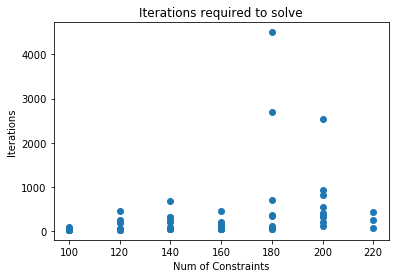


100 constraints
mean 42.9 med 36 max 94

120 constraints
mean 117.7 med 35 max 465

140 constraints
mean 204.9 med 46 max 689

160 constraints
mean 121.2 med 111 max 453

180 constraints
mean 899.6 med 57 max 4501

200 constraints
mean 659.5 med 825 max 2545

220 constraints
mean 245.66666666666666 med 243 max 428


In [12]:
# PLOTTING
xs, ys = [], []

for k, v in data.items():
    for result in v:
        xs.append(k)
        ys.append(result[3])
plt.title("Iterations required to solve")
plt.xlabel("Num of Constraints")
plt.ylabel("Iterations")
plt.scatter(xs, ys)
plt.show()

for k, v in data.items():
    print()
    print(k, "constraints")
    iters_all = [result[3] for result in v]
    print("mean", sum(iters_all)/len(iters_all), "med", iters_all[len(iters_all)//2], "max", max(iters_all))
    


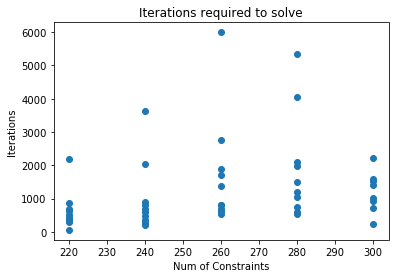


220 constraints
mean 633.8 med 409 max 2201

240 constraints
mean 993.4 med 2032 max 3617

260 constraints
mean 1720.7 med 630 max 5995

280 constraints
mean 1906.0 med 1184 max 5355

300 constraints
mean 1202.375 med 1600 max 2233


In [4]:
# PLOTTING
xs, ys = [], []

for k, v in data.items():
    for result in v:
        xs.append(k)
        ys.append(result[3])
plt.title("Iterations required to solve")
plt.xlabel("Num of Constraints")
plt.ylabel("Iterations")
plt.scatter(xs, ys)
plt.show()

for k, v in data.items():
    print()
    print(k, "constraints")
    iters_all = [result[3] for result in v]
    print("mean", sum(iters_all)/len(iters_all), "med", iters_all[len(iters_all)//2], "max", max(iters_all))
    


In [8]:
print(data)

{300: []}
